# Dependencies

In [1]:
pacman::p_load(ggplot2, fitdistrplus, distr)

# Functions

In [2]:
source("/Users/anabbi/git/ped_CapTCRseq/R/ggplot2_theme.R")
source("/Users/anabbi/git/ped_CapTCRseq/R/color_schemes.R")
source("/Users/anabbi/git/ped_CapTCRseq/R/Misc_functions.R")

# Paths

In [3]:
datapath <- "/Users/anabbi/OneDrive - UHN/Documents/INTERCEPT/Data/"
plotpath <- "/Users/anabbi/OneDrive - UHN/Documents/INTERCEPT/Plots/"
manifestpath <- "/Users/anabbi/OneDrive - UHN/Documents/INTERCEPT/Manifests/"

gitpath <- "/Users/anabbi/git/ped_CapTCRseq/"

In [4]:
h4hpath <- "/Users/anabbi/Desktop/H4H/INTERCEPT/"

# Main

In [5]:
discovery_metadata <- readr::read_rds(file = paste0(datapath, "discovery_metadata_01.rds"))
validation_metadata <- readr::read_rds(file = paste0(datapath, "validation_metadata_01.rds"))

In [6]:
discovery_metadata[ grepl("-01", discovery_metadata$sample_name ),]

,Patient,Age,sampletype,study,Agegroup,Sex,disease,sample_name
,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
2121,CHP_352,17,PBMC,INTERCEPT,Child,NA,Leukemia,CHP_352-01-PBMC-DNA
2181,CHP_353,6,PBMC,INTERCEPT,Child,NA,Leukemia,CHP_353-01-PBMC-DNA
2261,CHP_354,9,PBMC,INTERCEPT,Child,NA,Leukemia,CHP_354-01-PBMC-DNA
2321,CHP_355,3,PBMC,INTERCEPT,Child,NA,Leukemia,CHP_355-01-PBMC-DNA
3021,CHP_363,20,PBMC,INTERCEPT,Child,NA,Solid,CHP_363-01_PBMC-DNA
3091,CHP_364,16,PBMC,INTERCEPT,Child,NA,Solid,CHP_364-01-PBMC-DNA
3181,CHP_365,7,PBMC,INTERCEPT,Child,NA,Leukemia,CHP_365-01_PBMC-DNA
3251,CHP_366,14,PBMC,INTERCEPT,Child,NA,Lymphoma,CHP_366-01-PBMC-DNA
3411,CHP_368,1,PBMC,INTERCEPT,Child,NA,Solid,CHP_368-01-PBMC-DNA


In [7]:
# from GLIPH_input.ipynb
taball_pbmc <- readr::read_rds(file = paste0(datapath, "capTCRseq/INT_01_LFS_gliph_input.rds"))

In [8]:
table(taball_pbmc$`subject:condition`)


     CHP_346      CHP_347      CHP_348      CHP_349      CHP_350      CHP_352 
          35          153           89           18          153           18 
     CHP_353      CHP_354      CHP_355      CHP_357      CHP_361      CHP_362 
         219            6           14          295           90          149 
     CHP_363      CHP_364      CHP_365      CHP_366      CHP_367      CHP_368 
         876          118          428          127           38          252 
     CHP_369      CHP_370      CHP_371      CHP_372      CHP_373      CHP_377 
         721           17          670            3          279          190 
     CHP_378      CHP_381      CHP_387      CHP_394      CHP_396      CHP_397 
         590          790          275            1          304          171 
     CHP_399      CHP_401      CHP_404      CHP_405      CHP_408      CHP_409 
          30          112          340           41           13          126 
     CHP_410      CHP_411      CHP_412      CHP_413

In [9]:
head(discovery_metadata)

,Patient,Age,sampletype,study,Agegroup,Sex,disease,sample_name
,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
21,Peds_Ctrl_2,NA,PBMC,Henderson,Child,NA,Peds healthy Control,Peds_Ctrl_2
22,MAS_3,NA,PBMC,Henderson,Child,NA,MAS,MAS_3
23,Peds_Febrile_Ctrl_3,NA,PBMC,Henderson,Child,NA,Peds febrile Control,Peds_Febrile_Ctrl_3
25,KD_4,NA,PBMC,Henderson,Child,NA,KD,KD_4
26,KD_3,NA,PBMC,Henderson,Child,NA,KD,KD_3
29,sJIA_7,NA,PBMC,Henderson,Child,NA,sJIA,sJIA_7


In [10]:
taball_pbmc_discovery <- taball_pbmc[taball_pbmc$`subject:condition` %in% discovery_metadata$Patient,]

In [11]:
head(taball_pbmc_discovery)

,CDR3b,TRBV,TRBJ,subject:condition,count,clonefraction,subject,file,index
,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<chr>,<chr>,<int>
154,CASGVGASIQYF,TRBV3-1,TRBJ2-4,CHP_354,53,0.24537037,CHP_354-01-PBMC-DNA,/Users/anabbi/Desktop/H4H/INTERCEPT/NextSeq/batch_reseq_24Feb2020/mixcr/clones/CLONES_TRBCHP_354-01-PBMC-DNA.txt,154
155,CASSFNEGLVQPQHF,TRBV28,TRBJ1-5,CHP_354,45,0.20833333,CHP_354-01-PBMC-DNA,/Users/anabbi/Desktop/H4H/INTERCEPT/NextSeq/batch_reseq_24Feb2020/mixcr/clones/CLONES_TRBCHP_354-01-PBMC-DNA.txt,155
156,CASSFTAADQETQYF,TRBV6-5,TRBJ2-5,CHP_354,41,0.18981481,CHP_354-01-PBMC-DNA,/Users/anabbi/Desktop/H4H/INTERCEPT/NextSeq/batch_reseq_24Feb2020/mixcr/clones/CLONES_TRBCHP_354-01-PBMC-DNA.txt,156
157,CASSLALSGADGELFF,TRBV7-9,TRBJ2-2,CHP_354,7,0.03240741,CHP_354-01-PBMC-DNA,/Users/anabbi/Desktop/H4H/INTERCEPT/NextSeq/batch_reseq_24Feb2020/mixcr/clones/CLONES_TRBCHP_354-01-PBMC-DNA.txt,157
158,CASSLGGANYGYTF,TRBV12-3,TRBJ1-2,CHP_354,17,0.07870370,CHP_354-01-PBMC-DNA,/Users/anabbi/Desktop/H4H/INTERCEPT/NextSeq/batch_reseq_24Feb2020/mixcr/clones/CLONES_TRBCHP_354-01-PBMC-DNA.txt,158
159,CASSYPDSGSSTDTQYF,TRBV6-6,TRBJ2-3,CHP_354,17,0.07870370,CHP_354-01-PBMC-DNA,/Users/anabbi/Desktop/H4H/INTERCEPT/NextSeq/batch_reseq_24Feb2020/mixcr/clones/CLONES_TRBCHP_354-01-PBMC-DNA.txt,159


In [12]:
length(unique(taball_pbmc_discovery$`subject:condition`))

[1] 34

In [13]:
readr::write_rds(taball_pbmc_discovery, file = paste0(h4hpath,"analysis/GLIPH/GLIPH_input/INT_gliph_input_discovery.rds"))

Adaptive data

In [22]:
# use cleaned up Adaptive data geenrated in GLIPH_input.ipynb
myfilelist <- list.files("/Users/anabbi/Desktop/H4H/projects/INTERCEPT/Adaptive/tsv_cleanup/", 
                        pattern = ".txt", full.names = T, recursive = T)

In [23]:
myfilelist <- myfilelist[!grepl("files", myfilelist)]

In [24]:
myfilelist_df <- data.frame(file = myfilelist, stringsAsFactors = F)

In [25]:
myfilelist_df$sample <- gsub(".txt", "", basename(myfilelist_df$file))

In [26]:
dim(discovery_metadata)

[1] 973   8

In [27]:
table(discovery_metadata$study)


  Emerson Henderson INTERCEPT  Mitchell 
      654        25        91       203 

In [31]:
head(myfilelist_df)

,file,sample
,<chr>,<chr>
1,/Users/anabbi/Desktop/H4H/projects/INTERCEPT/Adaptive/tsv_cleanup//Carey_Preterm2017/Adult_1_15-04.txt,Adult_1_15-04
2,/Users/anabbi/Desktop/H4H/projects/INTERCEPT/Adaptive/tsv_cleanup//Carey_Preterm2017/Adult_2_15-07.txt,Adult_2_15-07
3,/Users/anabbi/Desktop/H4H/projects/INTERCEPT/Adaptive/tsv_cleanup//Carey_Preterm2017/Adult_3_15-03.txt,Adult_3_15-03
4,/Users/anabbi/Desktop/H4H/projects/INTERCEPT/Adaptive/tsv_cleanup//Carey_Preterm2017/Adult_4_15-05.txt,Adult_4_15-05
5,/Users/anabbi/Desktop/H4H/projects/INTERCEPT/Adaptive/tsv_cleanup//Carey_Preterm2017/Adult_5_15-06.txt,Adult_5_15-06
6,/Users/anabbi/Desktop/H4H/projects/INTERCEPT/Adaptive/tsv_cleanup//Carey_Preterm2017/Cord_1_NWK206.txt,Cord_1_NWK206


In [28]:
myfilelist_discovery <- myfilelist_df$file[ myfilelist_df$sample %in% discovery_metadata$sample_name]

In [29]:
myfilelist_discovery <- gsub("/Users/anabbi/Desktop/H4H/projects/INTERCEPT/",
"/cluster/projects/pughlab/projects/INTERCEPT/", myfilelist_discovery)

In [30]:
head(myfilelist_discovery)

[1] "/cluster/projects/pughlab/projects/INTERCEPT/Adaptive/tsv_cleanup//Henderson_MIS2022/KD_1.txt" 
[2] "/cluster/projects/pughlab/projects/INTERCEPT/Adaptive/tsv_cleanup//Henderson_MIS2022/KD_2.txt" 
[3] "/cluster/projects/pughlab/projects/INTERCEPT/Adaptive/tsv_cleanup//Henderson_MIS2022/KD_3.txt" 
[4] "/cluster/projects/pughlab/projects/INTERCEPT/Adaptive/tsv_cleanup//Henderson_MIS2022/KD_4.txt" 
[5] "/cluster/projects/pughlab/projects/INTERCEPT/Adaptive/tsv_cleanup//Henderson_MIS2022/MAS_1.txt"
[6] "/cluster/projects/pughlab/projects/INTERCEPT/Adaptive/tsv_cleanup//Henderson_MIS2022/MAS_2.txt"

In [32]:
readr::write_rds(myfilelist_discovery, file = paste0(h4hpath,"analysis/GLIPH/GLIPH_input/myfilelist_discovery.rds"))

In [33]:
#on h4h #sampleadaptive.fx 

In [34]:
dim(discovery_metadata[discovery_metadata$study != "INTERCEPT",])

[1] 882   8

find an appropriate distribution to draw random samples from. Based on entire INT samples regardless of cancer or cycle

In [35]:
meta_div <- readr::read_rds(file = paste0(datapath,"capTCRseq/meta_div_goodsamples.rds"))

In [36]:
pbmc <- meta_div[ which(meta_div$sampletype == "PBMC"),] 

In [37]:
dim(pbmc)

[1] 258  58

In [38]:
head(pbmc)

,sample_id,Patient,cycle,FOLD,ATC,Age,Disease_type,TE_fold,Pass,CD3,...,observed_Shannon,estimated_Shannon,SE_Shannon,observed_Simpson,estimated_Simpson,SE_Simpson,file,basename,Group,sampletype
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<lgl>,<int>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>
1,CHP_10YO_M_00,CHP_10YO_M,X00,NA,NA,NA,Normal,NA,NA,NA,...,10.591,10.601,0.074,8.556,8.561,0.097,batchNormal_16Apr2020/mixcr/clones/CLONES_TRBCHP_10YO-M_PBMC_DNA.txt,CHP_10YO-M_PBMC_DNA,CHP,PBMC
2,CHP_11YO_M_00,CHP_11YO_M,X00,NA,NA,NA,Normal,NA,NA,NA,...,11.607,11.614,0.055,10.406,10.414,0.074,batchNormal_16Apr2020/mixcr/clones/CLONES_TRBCHP_11YO-M_PBMC_DNA.txt,CHP_11YO-M_PBMC_DNA,CHP,PBMC
3,CHP_15YO_F_A_00,CHP_15YO_F_A,X00,NA,NA,NA,Normal,NA,NA,NA,...,8.982,8.989,0.042,8.560,8.570,0.060,batchNormal_16Apr2020/mixcr/clones/CLONES_TRBCHP_15YO-F-A_PBMC_DNA.txt,CHP_15YO-F-A_PBMC_DNA,CHP,PBMC
4,CHP_15YO_F_B_00,CHP_15YO_F_B,X00,NA,NA,NA,Normal,NA,NA,NA,...,6.330,6.334,0.039,5.870,5.876,0.059,batchNormal_16Apr2020/mixcr/clones/CLONES_TRBCHP_15YO-F-B_PBMC_DNA.txt,CHP_15YO-F-B_PBMC_DNA,CHP,PBMC
5,CHP_15YO_M_00,CHP_15YO_M,X00,NA,NA,NA,Normal,NA,NA,NA,...,21.110,21.120,0.040,20.321,20.339,0.079,batchNormal_16Apr2020/mixcr/clones/CLONES_TRBCHP_15YO-M_PBMC_DNA.txt,CHP_15YO-M_PBMC_DNA,CHP,PBMC
6,CHP_16YO_M_00,CHP_16YO_M,X00,NA,NA,NA,Normal,NA,NA,NA,...,3.972,3.973,0.007,3.944,3.946,0.012,batchNormal_16Apr2020/mixcr/clones/CLONES_TRBCHP_16YO-M_PBMC_DNA.txt,CHP_16YO-M_PBMC_DNA,CHP,PBMC


In [40]:
dim(pbmc[ which(pbmc$cycle == "X01"),])

[1] 47 58

In [41]:
x <- pbmc$TRB[!is.na(pbmc$TRB)]

summary statistics
------
min:  1   max:  2237 
median:  146 
mean:  252.5155 
estimated sd:  305.3916 
estimated skewness:  2.645502 
estimated kurtosis:  13.0775 

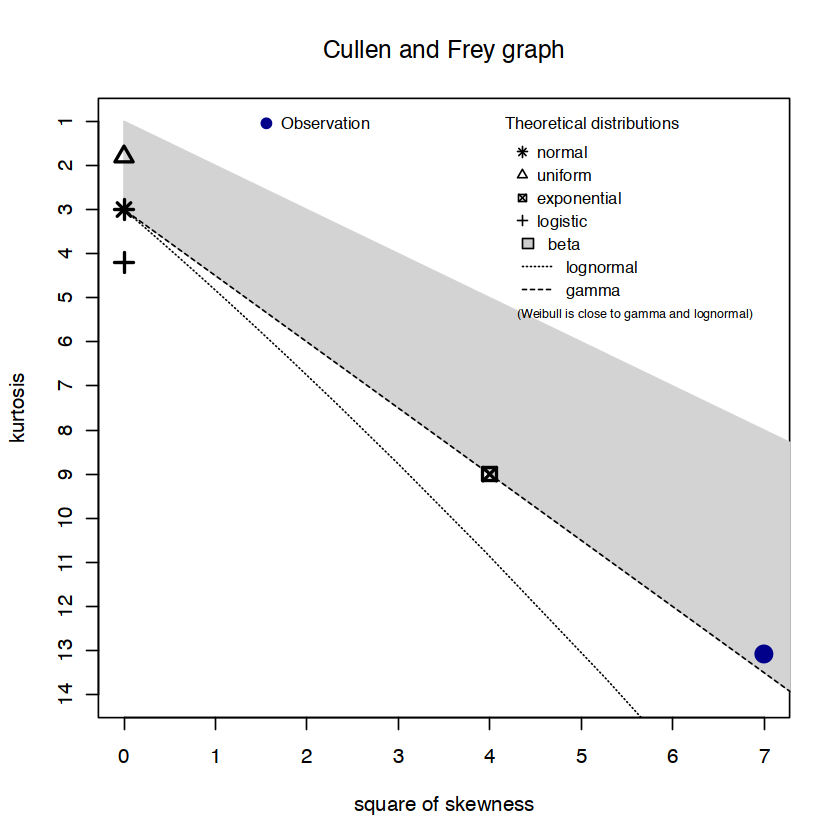

In [42]:
descdist(x, discrete = FALSE)

In [43]:
fit.weibull <- fitdist(x, "weibull")
fit.lnorm <- fitdist(x, "lnorm")
fit.gamma <- fitdist(x, "gamma")

In [44]:
fit.weibull

Fitting of the distribution ' weibull ' by maximum likelihood 
Parameters:
         estimate  Std. Error
shape   0.8553936  0.04114678
scale 232.4883135 17.84393922

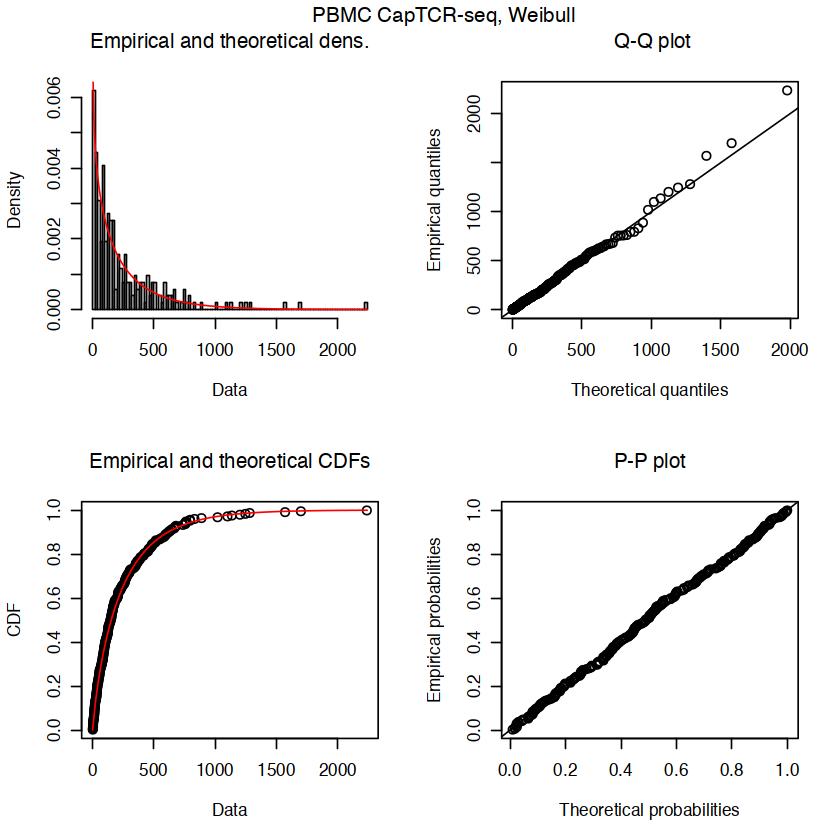

In [45]:
plot(fit.weibull, breaks = 100)
mtext("PBMC CapTCR-seq, Weibull", side = 3, line = 3)

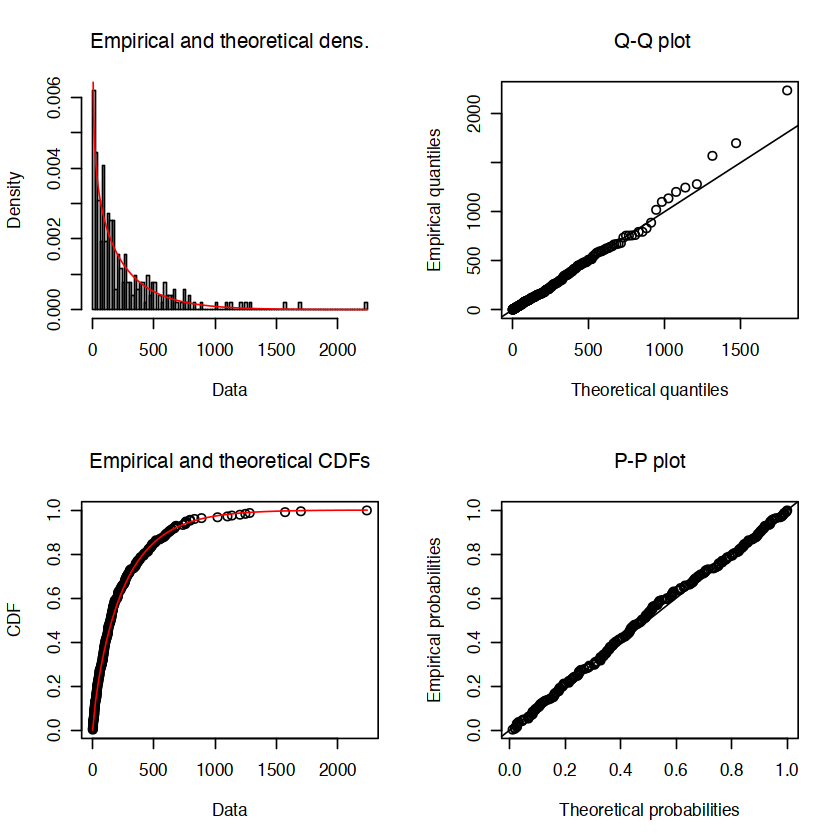

In [46]:
plot(fit.gamma, breaks = 100)

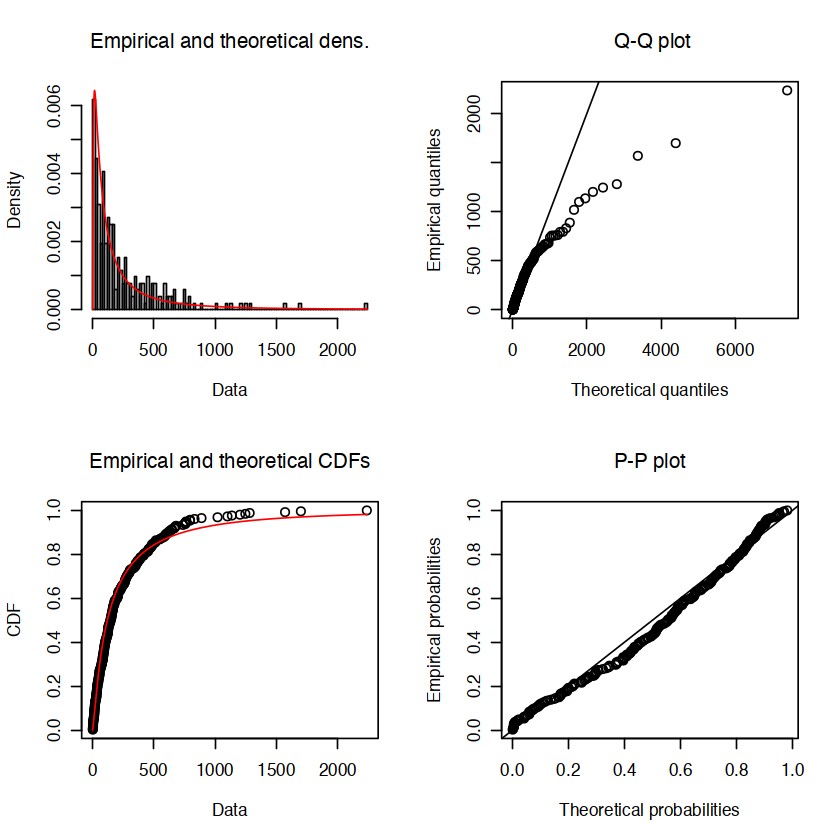

In [47]:
plot(fit.lnorm, breaks = 100)

In [48]:
summary(pbmc$TRB)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    1.0    55.0   146.0   252.5   351.0  2237.0 

In [49]:
dim(pbmc)

[1] 258  58

CapTCR-seq histogram

Warning message:
"Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
i Please use `linewidth` instead."


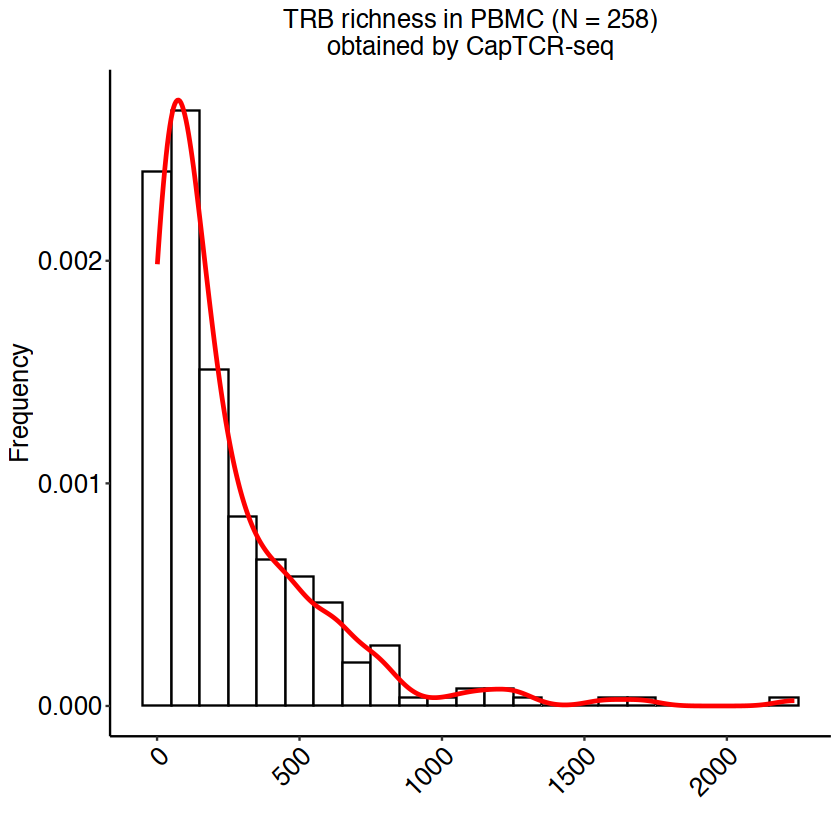

In [50]:
histdenp(pbmc, "TRB", 100) +
labs(x = "", y = "Frequency", title = "TRB richness in PBMC (N = 258)\nobtained by CapTCR-seq") #regardless of cycle or cancer type

Draw random samples

In [51]:
dim(discovery_metadata[discovery_metadata$study != "INTERCEPT",])

[1] 882   8

In [53]:
# we need 882 random values from Weibull distribution with shape = 0.8553936 and scale = 232.4883135

set.seed(777)
mydist <- Truncate(Weibull(shape=0.8553936,scale=232.4883135),lower=1,upper=2237) #based on estimates from CHP data

In [54]:
randomvals <- mydist@r(882)
summary(randomvals)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
   1.061   61.736  161.120  262.312  357.254 2228.094 

In [57]:
# round to nearest integer
randomvals <- round(randomvals)

In [58]:
readr::write_rds(randomvals, file = paste0(h4hpath,"analysis/GLIPH/GLIPH_input/random_weibullvals_discovery.rds"))

# backup

#### Cleanup VDJdb file - curated by Shirin

In [ ]:
VDJdb_tcr <- read.table(file = paste0(datapath, "CapTCRseq/VDJdb_MinimalScoreConfidence3.tsv"), sep = "\t", header = T)

In [ ]:
colnames(VDJdb_tcr)

[1] "complex.id"      "Gene"            "aaSeqCDR3"       "V"              
 [5] "J"               "MHC.A"           "MHC.B"           "MHC.class"      
 [9] "Epitope"         "Epitope.gene"    "Epitope.species" "Reference"

In [ ]:
head(VDJdb_tcr)

,complex.id,Gene,aaSeqCDR3,V,J,MHC.A,MHC.B,MHC.class,Epitope,Epitope.gene,Epitope.species,Reference
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,0,TRB,CAISGQAVSTDTQYF,TRBV10-3*01,TRBJ2-3*01,HLA-A*02,NA,MHCI,KLVALGINAV,NS3,HCV,PMID:27252176
2,0,TRB,CASDSNTEAFF,TRBV25-1*01,TRBJ1-1*01,HLA-A*02,NA,MHCI,KLVALGINAV,NS3,HCV,PMID:27252176
3,0,TRB,CASGWGSQPQHF,TRBV7-9*01,TRBJ1-5*01,HLA-A*11:01,NA,MHCI,AVFDRKSDAK,EBNA4,EBV,PMID:23267020
4,0,TRB,CASKGQGARDGYTF,TRBV6-6*01,TRBJ1-2*01,HLA-B*35:01,NA,MHCI,IPSINVHHY,pp65,CMV,PMID:23267020
5,0,TRB,CASKMRGDVYEQYF,TRBV18*01,TRBJ2-7*01,HLA-B*08:01,NA,MHCI,RAKFKQLL,BZLF1,EBV,PMID:23267020
6,0,TRB,CASMGNSAGANVLTF,TRBV10-1*01,TRBJ2-6*01,HLA-A*02,NA,MHCI,NLVPMVATV,pp65,CMV,PMID:9971792


In [ ]:
VDJdb_tcr$`subject:condition` <- paste0("VDJdb:",VDJdb_tcr$Epitope.gene,"_", VDJdb_tcr$Epitope.species)
VDJdb_tcr$count <- 1
VDJdb_tcr$clonefraction <- 1
VDJdb_tcr$subject <- "VDJdb"
VDJdb_tcr$file <- "VDJdb_MinimalScoreConfidence3.tsv"
VDJdb_tcr$index <- 1:nrow(VDJdb_tcr)

In [ ]:
VDJdb_tcr_cleanup <- VDJdb_tcr[, c("aaSeqCDR3", "V", "J", "subject:condition", "count", 
                                   "clonefraction", "subject", "file", "index")]

In [ ]:
head(VDJdb_tcr_cleanup)

,aaSeqCDR3,V,J,subject:condition,count,clonefraction,subject,file,index
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<int>
1,CAISGQAVSTDTQYF,TRBV10-3*01,TRBJ2-3*01,VDJdb:NS3_HCV,1,1,VDJdb,VDJdb_MinimalScoreConfidence3.tsv,1
2,CASDSNTEAFF,TRBV25-1*01,TRBJ1-1*01,VDJdb:NS3_HCV,1,1,VDJdb,VDJdb_MinimalScoreConfidence3.tsv,2
3,CASGWGSQPQHF,TRBV7-9*01,TRBJ1-5*01,VDJdb:EBNA4_EBV,1,1,VDJdb,VDJdb_MinimalScoreConfidence3.tsv,3
4,CASKGQGARDGYTF,TRBV6-6*01,TRBJ1-2*01,VDJdb:pp65_CMV,1,1,VDJdb,VDJdb_MinimalScoreConfidence3.tsv,4
5,CASKMRGDVYEQYF,TRBV18*01,TRBJ2-7*01,VDJdb:BZLF1_EBV,1,1,VDJdb,VDJdb_MinimalScoreConfidence3.tsv,5
6,CASMGNSAGANVLTF,TRBV10-1*01,TRBJ2-6*01,VDJdb:pp65_CMV,1,1,VDJdb,VDJdb_MinimalScoreConfidence3.tsv,6


In [ ]:
colnames(VDJdb_tcr_cleanup)[1:3] <- c('CDR3b', 'TRBV', 'TRBJ')

In [ ]:
VDJdb_tcr_cleanup$TRBV <- gsub("[*]0.*", "", VDJdb_tcr_cleanup$TRBV)
VDJdb_tcr_cleanup$TRBJ <- gsub("[*]0.*", "", VDJdb_tcr_cleanup$TRBJ)

In [ ]:
head(VDJdb_tcr_cleanup)

,CDR3b,TRBV,TRBJ,subject:condition,count,clonefraction,subject,file,index
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<int>
1,CAISGQAVSTDTQYF,TRBV10-3,TRBJ2-3,VDJdb:NS3_HCV,1,1,VDJdb,VDJdb_MinimalScoreConfidence3.tsv,1
2,CASDSNTEAFF,TRBV25-1,TRBJ1-1,VDJdb:NS3_HCV,1,1,VDJdb,VDJdb_MinimalScoreConfidence3.tsv,2
3,CASGWGSQPQHF,TRBV7-9,TRBJ1-5,VDJdb:EBNA4_EBV,1,1,VDJdb,VDJdb_MinimalScoreConfidence3.tsv,3
4,CASKGQGARDGYTF,TRBV6-6,TRBJ1-2,VDJdb:pp65_CMV,1,1,VDJdb,VDJdb_MinimalScoreConfidence3.tsv,4
5,CASKMRGDVYEQYF,TRBV18,TRBJ2-7,VDJdb:BZLF1_EBV,1,1,VDJdb,VDJdb_MinimalScoreConfidence3.tsv,5
6,CASMGNSAGANVLTF,TRBV10-1,TRBJ2-6,VDJdb:pp65_CMV,1,1,VDJdb,VDJdb_MinimalScoreConfidence3.tsv,6


In [ ]:
save(VDJdb_tcr_cleanup, file = paste0(datapath, "capTCRseq/VDJdb_tcr_cleanup.RData"))

In [ ]:
load(file = paste0(datapath, "capTCRseq/VDJdb_tcr_cleanup.RData"))

In [ ]:
#save(VDJdb_tcr_cleanup, 
#     file = "/Users/anabbi/Desktop/H4H/INTERCEPT/Adaptive/tsv_cleanup/gliphinput/VDJdb_tcr_cleanup.RData")

In [32]:
#bind those with the same cdr3 + TRBV + TRBJ
setDT(covidfle_uniq)

ab <- covidfle_uniq[, .(subject = toString(`subject:condition`), #bind subjects
                        count = sum(count)),  #get sum of counts
                    by = c("CDR3b", "TRBV", "TRBJ")] #get duplicates sequences with the same cdr3 + TRBV + TRBJ

covidfle_uniq_ab <- merge(covidfle_uniq, ab, by = c("CDR3b","TRBV","TRBJ")) # merge together

In [33]:
dim(covidfle_uniq_ab)

[1] 156033      7

In [34]:
colnames(covidfle_uniq_ab)

[1] "CDR3b"             "TRBV"              "TRBJ"             
[4] "subject:condition" "count.x"           "subject"          
[7] "count.y"

In [35]:
#dedup
covidfle_uniq_ab_dedup <- dplyr::distinct(covidfle_uniq_ab, 
                                          CDR3b, TRBV, TRBJ, subject, .keep_all= TRUE)

In [36]:
head(covidfle_uniq_ab_dedup)

CDR3b,TRBV,TRBJ,subject:condition,count.x,subject,count.y
<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<int>
AGVKITNSYEQYF,TCRBV20-X,TCRBJ02-07,eHO134,1,eHO134,1
AKNIQYF,TCRBV27-01,TCRBJ02-04,eQD126,1,eQD126,1
APYASKRAGYDNEQFF,TCRBV06-X,TCRBJ02-01,eHO141,1,eHO141,1
ARLFSGANVLTF,TCRBV07-02,TCRBJ02-06,eXL27,1,eXL27,1
CAAAAPDTQYF,TCRBV06-X,TCRBJ02-03,eOX46,1,eOX46,1
CAAADRMTDTQYF,TCRBV24-01,TCRBJ02-03,eHO130,1,eHO130,1


In [40]:
dim(covidfle_uniq_ab_dedup)

[1] 148678      7

In [38]:
#replaqce TCRB with TRB
covidfle_uniq_ab_dedup$TRBV <- gsub("TCRB", "TRB", covidfle_uniq_ab_dedup$TRBV)
covidfle_uniq_ab_dedup$TRBJ <- gsub("TCRB", "TRB", covidfle_uniq_ab_dedup$TRBJ)

In [41]:
head(covidfle_uniq_ab_dedup[order(covidfle_uniq_ab_dedup$count.y, decreasing = T),])

CDR3b,TRBV,TRBJ,subject:condition,count.x,subject,count.y
<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<int>
CASSIRSSYEQYF,TRBV19-01,TRBJ02-07,eOX46,1,"eOX46, ePD84, eHO128, eHO132, eHO125, ePD83, eHO136, eLH41, eHO124, ePD86, eLH42, eHO130, ePD76, eQD137, eQD123, eMR20, eEE243, eHH173, eHH174, eQD124, eHH169, eEE228, eXL27, eQD115, eXL36, eMR12, eLH47, eDH113, eEE226, eXL37, eDH96, eXL30",32
CASSQTGGRNQPQHF,TRBV12-X,TRBJ01-05,eLH41,1,"eLH41, eJL164, eXL31, eHO132, ePD86, eAV88, ePD84, eEE243, eXL37, eQD118, eEE224, eXL27, eMR12, eOX56, eLH47, eMR18, eLH46, eQD136, eOX43, eOX54, ePD76",21
CASSLAGAYEQYF,TRBV05-01,TRBJ02-07,eJL143,1,"eJL143, ePD79, eHH175, eLH45, eHO126, eXL31, eLH49, eLH42, eJL157, eHO135, eLH54, eMR14, eLH47, eAV91, eQD109, eQD111, eMR23, eQD123, eMR15",19
CASSFSYEQYF,TRBV12-03/12-04,TRBJ02-07,eEE243,1,"eEE243, eHH175, eXL30, eHO130, eJL149, eAV88, eXL27, eOX54, eEE224, eEE228, eOX49, eEE226, eOX52, eEE240, eOX46, eOX43, eXL31",17
CASSLSAPQETQYF,TRBV27-01,TRBJ02-05,eMR17,1,"eMR17, eJL161, eHO134, eQD124, eMR13, eQD111, eQD121, eHO140, eMR12, eQD125, eLH47, eEE226, eQD126, eQD114, eQD110, eQD120",16
CASSVGETQYF,TRBV09-01,TRBJ02-05,eOX56,1,"eOX56, eEE224, eEE226, eEE228, eOX49, eOX54, eOX52, eXL27, eXL30, eOX43, eOX46, eXL32, eEE240, eAV88, eQD128, eHH175",16


In [42]:
covidfle_uniq_ab_dedup$file <- "COVID_specific_TCRB.tsv"

In [45]:
covidfle_uniq_ab_dedup$clonefraction <- 1

In [47]:
covidfle_uniq_ab_dedup_subset <- covidfle_uniq_ab_dedup[,c("CDR3b", "TRBV", "TRBJ", "subject:condition",
                                                          "count.y", "clonefraction", "subject","file")]

In [49]:
colnames(covidfle_uniq_ab_dedup_subset)[ colnames(covidfle_uniq_ab_dedup_subset) == "count.y"] <- "count"

In [73]:
covidfle_uniq_ab_dedup_subset$index <- 1:nrow(covidfle_uniq_ab_dedup_subset)

In [74]:
save(covidfle_uniq_ab_dedup_subset, file = paste0(datapath, "capTCRseq/covidfle_uniq_ab_dedup_subset.RData"))